### Μηχανική Μάθηση 
#### 2η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίηση k-means, καθώς και την μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα. 

Ονοματεπώνυμο φοιτητή: Γεράσιμος Μαρκαντωνάτος

Α.Μ.: el19149

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα [`salinas_image.npy`](https://drive.google.com/file/d/1NaVn4BpaGmyN3UJOQhTGgMlfznnKhWdD/view?usp=share_link) και τις αντίστοιχες επισημειώσεις [`salinas_labels.npy`](https://drive.google.com/file/d/1u05ZSU8ptz9ZWCi4WuenqG8KuAh981LZ/view?usp=share_link).

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [2]:
import numpy as np
img = np.load('salinas_image.npy')


1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά πίξελ εικόνας `salinas_labels.npy`. Οι επισημειώσεις αυτές αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές καλλιέργειες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):
```python
crop_type = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]
```

In [3]:
labels = np.load('salinas_labels.npy')

In [4]:
labels


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [16, 16, 16, ...,  0,  0,  0],
       [16, 16, 16, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων 

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 155ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `crop_type` που σας δόθηκε προηγουμένως.

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

2α

In [5]:
dimensions = img.shape
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (512, 217, 204)
Image Height       :  512
Image Width        :  217
Number of Channels :  204


2β

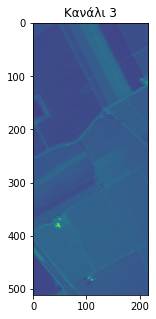

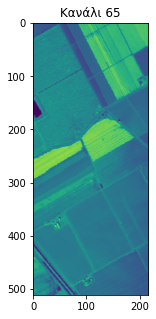

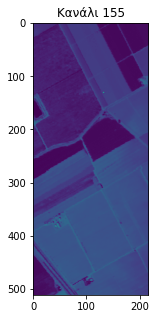

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.title(f'Κανάλι {3}')
plt.imshow(img[:,:,3]) 
plt.figure(figsize=(15,5))
plt.title(f'Κανάλι {65}')
plt.imshow(img[:,:,65]) 
plt.figure(figsize=(15,5))
plt.title(f'Κανάλι {155}')
plt.imshow(img[:,:,155]) 



2γ

In [7]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

Έχουμε 16 διαφορετικές κατηγορίες.

2δ

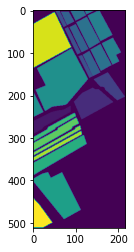

In [8]:
plt.imshow(labels)
plt.show()

2ε

In [9]:
numbers = np.unique(labels, return_counts=True)
num = numbers[1]
num

array([56975,  2009,  3726,  1976,  1394,  2678,  3959,  3579, 11271,
        6203,  3278,  1068,  1927,   916,  1070,  7268,  1807])

In [10]:
crop_type = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]

np.vstack((crop_type, num)).T


array([['Undefined', '56975'],
       ['Brocoli_green_weeds_1', '2009'],
       ['Brocoli_green_weeds_2', '3726'],
       ['Fallow', '1976'],
       ['Fallow_rough_plow', '1394'],
       ['Fallow_smooth', '2678'],
       ['Stubble', '3959'],
       ['Celery', '3579'],
       ['Grapes_untrained', '11271'],
       ['Soil_vinyard_develop', '6203'],
       ['Corn_senesced_green_weeds', '3278'],
       ['Lettuce_romaine_4wk', '1068'],
       ['Lettuce_romaine_5wk', '1927'],
       ['Lettuce_romaine_6wk', '916'],
       ['Lettuce_romaine_7wk', '1070'],
       ['Vinyard_untrained', '7268'],
       ['Vinyard_vertical_trellis', '1807']], dtype='<U25')

### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, "διώχτε" όσα δεδομένα είναι επισημειωμένα ως `Undefined`. 

💡 Χρησιμοποιήστε την `numpy reshape` 

In [11]:
n, m , c= img.shape
image = img.reshape((n*m),c)
image

array([[290, 381, 585, ...,  36,  11,  17],
       [290, 381, 519, ...,  36,  11,  15],
       [290, 381, 585, ...,  30,  11,  11],
       ...,
       [447, 405, 674, ...,  42,  11,  23],
       [447, 405, 674, ...,  42,  17,  27],
       [376, 489, 674, ...,  42,  15,  23]], dtype=int16)

In [12]:
image.shape

(111104, 204)

In [13]:
labels2 = labels.flatten()

In [14]:
undefined = np.where(labels2 == 0)
undefined

(array([     0,      1,      2, ..., 111101, 111102, 111103]),)

In [15]:
nimage = np.delete(image,undefined[0],axis = 0)

In [16]:
nlabels = np.delete(labels2,undefined[0],axis = 0)

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων πίξελ. 

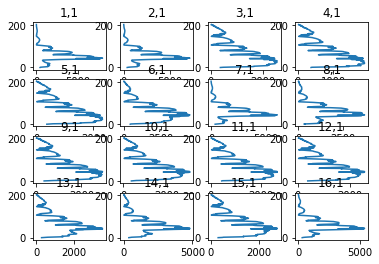

<Figure size 3600x3600 with 0 Axes>

In [17]:
arr = np.arange(204)
for i in range(1,17):
  pixela = np.where(nlabels == i)
  p = pixela[0]
  pixel = p[1]
  plt.subplot(4,4,i)
  plt.plot(nimage[pixel], arr)
  plt.title('{},{}'.format(i,1))
plt.figure(figsize=(50, 50))
plt.show()


3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα. 

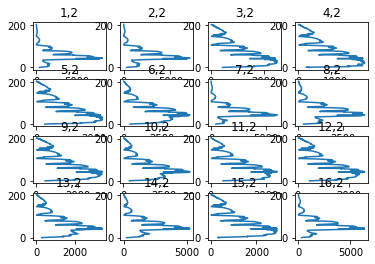

<Figure size 3600x3600 with 0 Axes>

In [18]:
for i in range(1,17):
  pixela = np.where(nlabels == i)
  p = pixela[0]
  pixel = p[2]
  plt.subplot(4,4,i)
  plt.plot(nimage[pixel], arr)
  plt.title('{},{}'.format(i,2))
plt.figure(figsize=(50, 50))
plt.show()

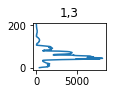

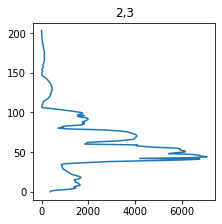

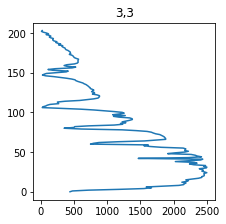

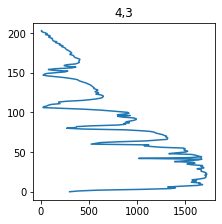

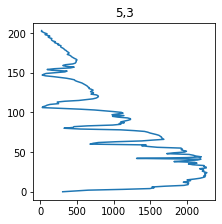

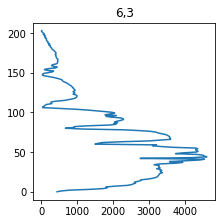

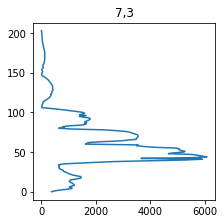

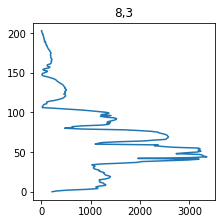

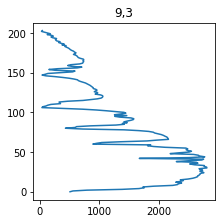

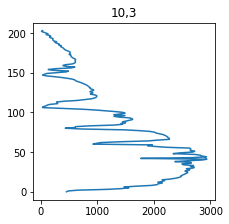

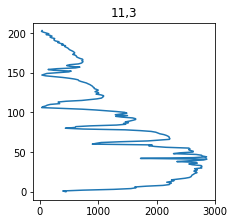

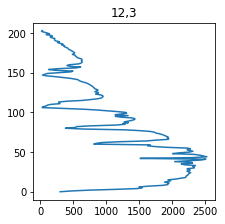

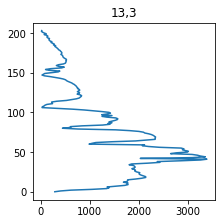

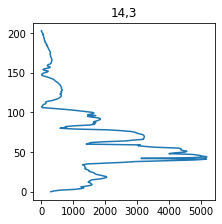

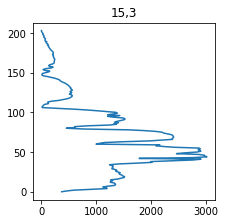

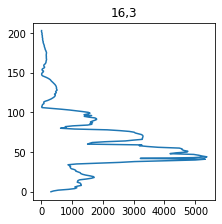

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for i in range(1,17):
  pixela = np.where(nlabels == i)
  p = pixela[0]
  pixel = p[3]
  plt.subplot(4,4,i)
  plt.plot(nimage[pixel], arr)
  plt.title('{},{}'.format(i,3))
  plt.figure(figsize=(15, 15))
plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους; 
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Υπάρχουν καλλιέργιες με φασματική υπογραφή που ξεχωρίζει με αποτέλεσμα να είναι πιο εύκολα διαχωρίσιμες. 
Υπάρχουν κανάλια τα οποία δεν είναι τόσο χρήσιμα αφού δεν αλλάζει η τιμή αρκετά ώστε να ξεχωρίσουμε τις καλλιέργιες μεταξύ τους.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

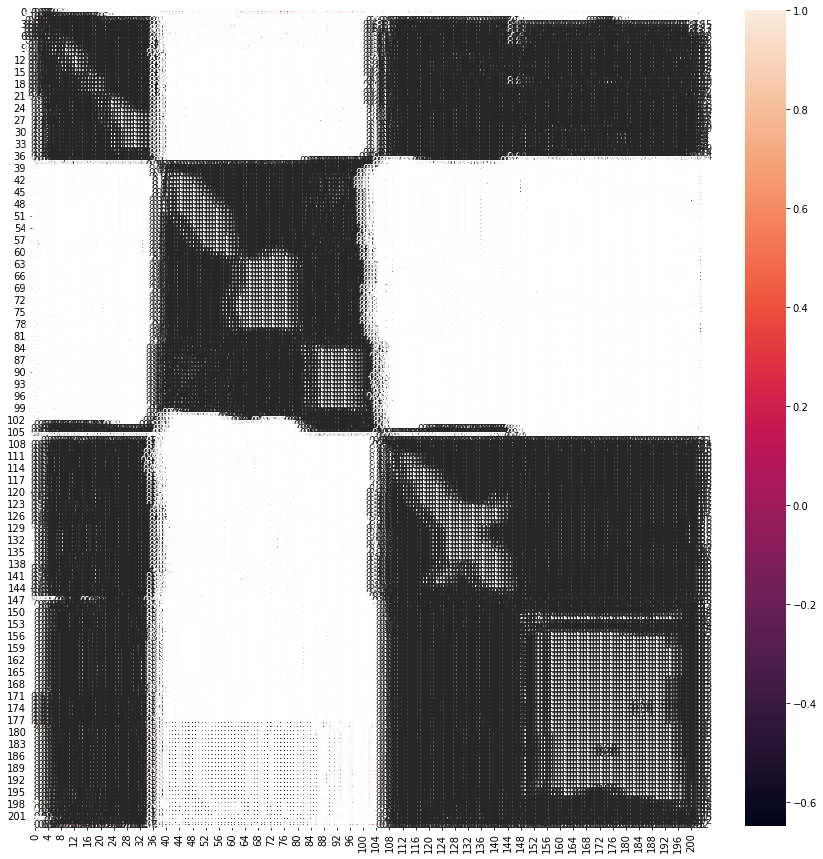

In [19]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
im = pd.DataFrame(nimage)
corr_matrix = im.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# extra code – the exact arguments of make_blobs() are not important
nimage.shape


(54129, 204)

In [21]:
kmeans = KMeans(n_clusters=16, n_init=10, max_iter=1,
                      random_state=5)
y_pred = kmeans.fit_predict(nimage)


In [ ]:
kmeans.cluster_centers_

array([[389.95740103, 491.10370052, 686.62306368, ...,   3.94018933,
          1.57444062,   2.41092943],
       [310.29680881, 397.18469359, 571.80768145, ...,  18.879695  ,
          6.54871505,  10.58288619],
       [406.76316052, 527.82159624, 768.42523224, ...,  64.53211467,
         23.52142643,  37.15512936],
       ...,
       [322.74620061, 412.91850304, 589.44737842, ...,  19.4162234 ,
          6.8643617 ,  11.0087386 ],
       [317.62570575, 402.61441382, 569.35669213, ...,  12.61076054,
          4.52208569,   7.35237463],
       [351.7948895 , 456.52071823, 645.2589779 , ...,  39.06422652,
         14.10566298,  22.34046961]])

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score 

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχήσουμε τα διαφορετικά ID των cluster στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [22]:
from sklearn.metrics import silhouette_score


In [23]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
nlabels = nlabels-1

In [25]:

y_pred1 = translate_predicted_labels(y_pred, nlabels)
print(y_pred1)


map: 0 --> 0
map: 1 --> 9
map: 2 --> 8
map: 3 --> 1
map: 4 --> 5
map: 5 --> 2
map: 6 --> 4
map: 7 --> 7
map: 8 --> 3
map: 9 --> 6
map: 10 --> 13
map: 11 --> 11
map: 12 --> 10
map: 13 --> 14
map: 14 --> 15
map: 15 --> 12
[ 5 10 10 ... 15 15 15]


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(nlabels,y_pred1)



0.6022095364776737

In [27]:
from sklearn.metrics.cluster import rand_score
rand_score( nlabels,y_pred)

0.9055991603563917

In [28]:
silhouette_score(nimage, kmeans.labels_)

0.43998643510370256

4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχησμένα predicted labels).

In [29]:
from sklearn.metrics import confusion_matrix
num_labels = len(np.unique(nlabels))
cm = confusion_matrix(nlabels, y_pred1, labels = range(num_labels))
cm

array([[1977,   31,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 572, 2895,   20,    0,    0,    0,  222,    0,    0,    0,    0,
           0,    0,   11,    1,    5],
       [   0,    0,    0,    2,  876,    0,    0,    0,  169,    0,    0,
         929,    0,    0,    0,    0],
       [   0,    0,    0, 1380,   14,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,   29, 2618,    0,    0,    0,    5,    0,    0,
          26,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 3330,    0,    0,   15,    0,  602,
           2,    1,    9,    0,    0],
       [   0,    0, 1424,    0,    0,    0, 2130,    1,    0,    1,    0,
           1,    3,    1,    3,   15],
       [   0,    0,   19,    0,    0,    0,    2, 4899,   64, 1521,   21,
          10,  220,    7, 2726, 1782],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6193,    0,    0,
           0,   10,   

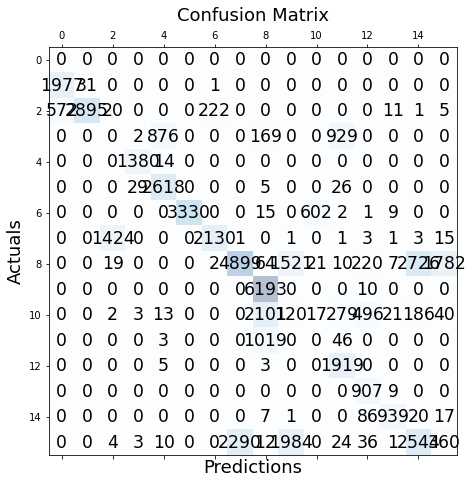

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X2D = pca.fit_transform(nimage)

In [31]:
pca.components_

array([[ 6.60592043e-04,  1.29127113e-04, -1.53371945e-03,
        -4.63431207e-03, -6.66982335e-03, -8.10516114e-03,
        -9.63947620e-03, -1.35377321e-02, -1.83103941e-02,
        -2.15682051e-02, -2.37465534e-02, -2.63231790e-02,
        -2.75774042e-02, -3.06566948e-02, -3.21998915e-02,
        -2.99598448e-02, -2.75013313e-02, -2.57319315e-02,
        -2.66628133e-02, -2.96187144e-02, -3.59780186e-02,
        -4.37314759e-02, -4.89834906e-02, -5.23826627e-02,
        -5.63074855e-02, -5.89841219e-02, -6.05590763e-02,
        -6.34966067e-02, -6.64666997e-02, -6.76571556e-02,
        -7.31784842e-02, -7.40214634e-02, -7.18034020e-02,
        -7.36542670e-02, -6.83657503e-02, -5.90807026e-02,
        -3.91316850e-02, -1.76352824e-03,  4.78501100e-02,
         1.16467227e-01,  1.85047439e-01,  2.23388419e-01,
         1.40662643e-01,  2.17895013e-01,  2.36582857e-01,
         2.27733104e-01,  2.22572967e-01,  2.12256492e-01,
         1.78377363e-01,  1.84855879e-01,  1.98266055e-0

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [32]:
pca.explained_variance_ratio_

array([0.75418456, 0.22926902, 0.01123053])

In [33]:
print('Το ποσοστό της διακύμανσης των δεδομένων που διατηρείτε είναι ',pca.explained_variance_ratio_.sum() ,'%')

Το ποσοστό της διακύμανσης των δεδομένων που διατηρείτε είναι  0.9946841017129432 %


### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [34]:
kmeans = KMeans(n_clusters=16, n_init=10, max_iter=1,
                      random_state=5)
y_pred = kmeans.fit_predict(X2D)

In [35]:
y_pred1 = translate_predicted_labels(y_pred, nlabels)
print(y_pred1)

map: 0 --> 9
map: 1 --> 1
map: 2 --> 7
map: 3 --> 4
map: 4 --> 2
map: 5 --> 5
map: 6 --> 0
map: 7 --> 14
map: 8 --> 8
map: 9 --> 3
map: 10 --> 10
map: 11 --> 6
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 11
[ 5  5  5 ... 15 15 15]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(nlabels,y_pred1)

0.6297548449075357

In [37]:
from sklearn.metrics.cluster import rand_score
rand_score( nlabels,y_pred)

0.9157399814263347

In [38]:
silhouette_score(nimage, kmeans.labels_)

0.4365204795549927

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε; 

In [39]:
ac = np.empty([10])
rand = np.empty([10])
ss = np.empty([10])

In [40]:

for i in range(1,11):
  pca = PCA(n_components=i)
  x = pca.fit_transform(nimage)
  kmeans = KMeans(n_clusters=16, n_init=10, max_iter=1,random_state=5)
  y_pred = kmeans.fit_predict(x)
  y_pred1 = translate_predicted_labels(y_pred, nlabels)
  ac[i-1] = accuracy_score(nlabels,y_pred1)
  rand[i-1] = rand_score( nlabels,y_pred)
  ss[i-1] = silhouette_score(nimage, kmeans.labels_)
  


map: 0 --> 12
map: 1 --> 1
map: 2 --> 13
map: 3 --> 2
map: 4 --> 7
map: 5 --> 6
map: 6 --> 3
map: 7 --> 5
map: 8 --> 8
map: 9 --> 0
map: 10 --> 14
map: 11 --> 9
map: 12 --> 11
map: 13 --> 4
map: 14 --> 10
map: 15 --> 15
map: 0 --> 15
map: 1 --> 9
map: 2 --> 1
map: 3 --> 5
map: 4 --> 4
map: 5 --> 10
map: 6 --> 7
map: 7 --> 3
map: 8 --> 0
map: 9 --> 12
map: 10 --> 14
map: 11 --> 8
map: 12 --> 13
map: 13 --> 2
map: 14 --> 6
map: 15 --> 11
map: 0 --> 9
map: 1 --> 1
map: 2 --> 7
map: 3 --> 4
map: 4 --> 2
map: 5 --> 5
map: 6 --> 0
map: 7 --> 14
map: 8 --> 8
map: 9 --> 3
map: 10 --> 10
map: 11 --> 6
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 11
map: 0 --> 10
map: 1 --> 1
map: 2 --> 8
map: 3 --> 5
map: 4 --> 15
map: 5 --> 9
map: 6 --> 4
map: 7 --> 7
map: 8 --> 13
map: 9 --> 3
map: 10 --> 14
map: 11 --> 6
map: 12 --> 11
map: 13 --> 2
map: 14 --> 0
map: 15 --> 12
map: 0 --> 9
map: 1 --> 1
map: 2 --> 14
map: 3 --> 5
map: 4 --> 4
map: 5 --> 6
map: 6 --> 13
map: 7 --> 3
map: 8 --> 15


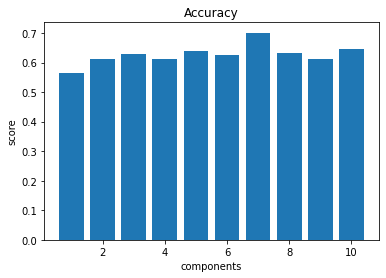

In [41]:
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(x1, ac)
plt.plot()
plt.xlabel("components")
plt.ylabel("score")
plt.title("Accuracy")
plt.show()

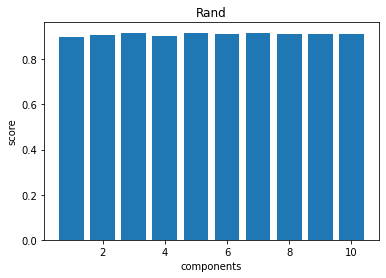

In [42]:
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(x1, rand)
plt.plot()
plt.xlabel("components")
plt.ylabel("score")
plt.title("Rand")
plt.show()

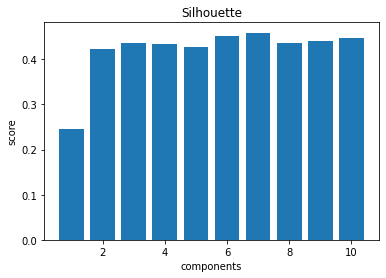

In [43]:
plt.bar(x1, ss)
plt.plot()
plt.xlabel("components")
plt.ylabel("score")
plt.title("Silhouette")
plt.show()